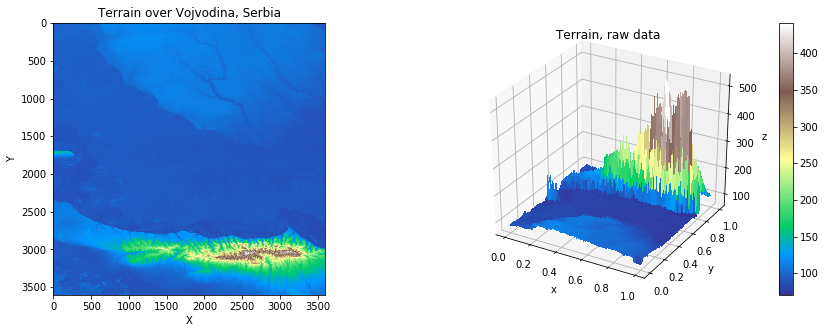

In [44]:
# Now the same code from the FrankeFunction project is applied on topographic data of Vojvodina, Serbia

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
import imageio
from imageio import imread

# Load the terrain
terrain = imread('Temerin.tif')
# Show the terrain
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Terrain over Vojvodina, Serbia')
ax.imshow(terrain, cmap='terrain')
ax.set_xlabel('X')
ax.set_ylabel('Y')

im_data = imageio.imread('Temerin.tif')

# Reduce the number of points for faster calculation (361x361 instead of 3610x3610)
data = im_data[0::10,0::10]

np.random.seed(13)

n = np.size(data,1)

x = np.arange(0, 1, 1/n)
y = np.arange(0, 1, 1/n)

xx, yy = np.meshgrid(x,y)

ax1 = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax1.plot_surface(xx, yy, data, cmap=cm.terrain, linewidth=0, antialiased=False)

# Customize the plot.
ax1.set_title('Terrain, raw data')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
fig.colorbar(surf)

fig.savefig('Original terrain.png')

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Ordinary least squares:

# Setting up the design matrices for 3rd, 4th, 5th and 15th order Polynomial:

poly3 = PolynomialFeatures(degree=3)
Xdes3 = poly3.fit_transform(np.c_[xx.ravel(), yy.ravel()])

poly4 = PolynomialFeatures(degree=4)
Xdes4 = poly4.fit_transform(np.c_[xx.ravel(), yy.ravel()])

poly5 = PolynomialFeatures(degree=5)
Xdes5 = poly5.fit_transform(np.c_[xx.ravel(), yy.ravel()])

poly15 = PolynomialFeatures(degree=15)
Xdes15 = poly15.fit_transform(np.c_[xx.ravel(), yy.ravel()])

z = data.reshape(-1,1)

# Setting up the fitting functions

ols3 = LinearRegression()
ols3.fit(Xdes3,z)

ols4 = LinearRegression()
ols4.fit(Xdes4,z)

ols5 = LinearRegression()
ols5.fit(Xdes5,z)

ols15 = LinearRegression()
ols15.fit(Xdes15,z)

# New data for testing and plotting the model:

n_row = np.size(data,1)
n_col = np.size(data,1)

ax_row = np.random.rand(n_row)
ax_col = np.random.rand(n_col)

sort_inds_row = np.argsort(ax_row)
sort_inds_col = np.argsort(ax_col)

ROW = ax_row[sort_inds_row]
COL = ax_col[sort_inds_col]

ROWp, COLp = np.meshgrid(ROW, COL)

X3plot = poly3.fit_transform(np.c_[ROWp.ravel(), COLp.ravel()])
X4plot = poly4.fit_transform(np.c_[ROWp.ravel(), COLp.ravel()])
X5plot = poly5.fit_transform(np.c_[ROWp.ravel(), COLp.ravel()])
X15plot = poly15.fit_transform(np.c_[ROWp.ravel(), COLp.ravel()])

# This evaluates the height associated for each pair of coordinate made from np.meshgrid

Zpredict3 = ols3.predict(X3plot)
Zpredict4 = ols4.predict(X4plot)
Zpredict5 = ols5.predict(X5plot)
Zpredict15 = ols15.predict(X15plot)

NameError: name 'np' is not defined

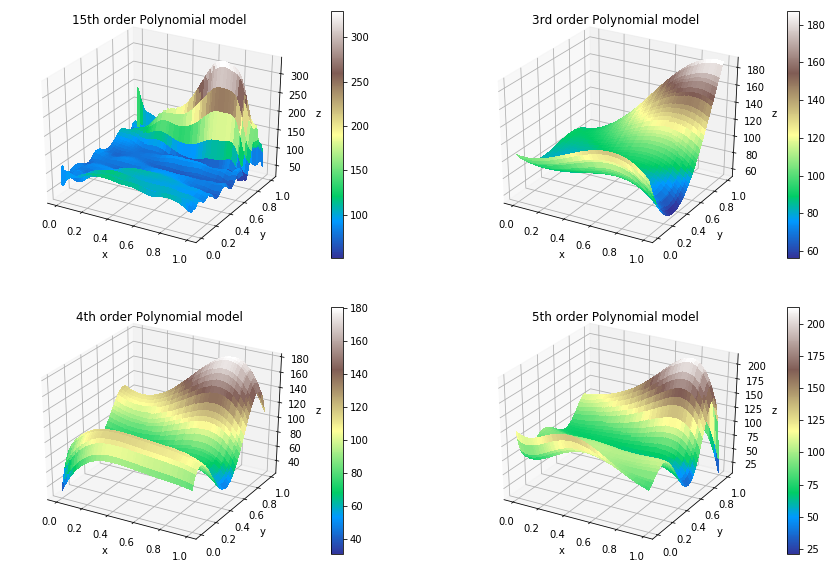

In [46]:
# Plot the generated surfaces for OLS models and original Franke Function.

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2, 2, 1, projection='3d')
surf = ax.plot_surface(ROWp, COLp, Zpredict15.reshape(*ROWp.shape), cmap=cm.terrain, linewidth=0, antialiased=False)

# Customize the plot.
ax.set_title('15th order Polynomial model')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
fig.colorbar(surf)


#fig3 = plt.figure()
ax3 = fig.add_subplot(2, 2, 2, projection='3d')
surf = ax3.plot_surface(ROWp, COLp, Zpredict3.reshape(*ROWp.shape), linewidth = 0, antialiased = False, cmap=cm.terrain)
ax3.set_title('3rd order Polynomial model')
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("z")
fig.colorbar(surf)

ax4 = fig.add_subplot(2, 2, 3, projection='3d')
#fig4 = plt.figure()
surf = ax4.plot_surface(ROWp, COLp, Zpredict4.reshape(*ROWp.shape), linewidth = 0, antialiased = False, cmap=cm.terrain)
ax4.set_title('4th order Polynomial model')
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_zlabel("z")
fig.colorbar(surf)

#fig5 = plt.figure()
ax5 = fig.add_subplot(2, 2, 4, projection='3d')
surf = ax5.plot_surface(ROWp, COLp, Zpredict5.reshape(*ROWp.shape), linewidth = 0, antialiased = False, cmap=cm.terrain)
ax5.set_title('5th order Polynomial model')
ax5.set_xlabel("x")
ax5.set_ylabel("y")
ax5.set_zlabel("z")
fig.colorbar(surf)

plt.show()

fig.savefig('Figure_terrain.png')

In [47]:
# Evaluating the OLS models: variances, MSE and R2 scores:

from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

v_beta3 = np.diag(np.linalg.inv(Xdes3.T.dot(Xdes3)))
sigma3 = 1/(n-3-1) * np.sum((z-Zpredict3)**2)
var3 = v_beta3*sigma3
print('Variance of betas, 3rd order:', var3)

v_beta4 = np.diag(np.linalg.inv(Xdes4.T.dot(Xdes4)))
sigma4 = 1/(n-4-1) * np.sum((z-Zpredict4)**2)
var4 = v_beta4*sigma4
print('Variance of betas, 4th order:', var4)

v_beta5 = np.diag(np.linalg.inv(Xdes5.T.dot(Xdes5)))
sigma5 = 1/(n-5-1) * np.sum((z-Zpredict5)**2)
var5 = v_beta5*sigma5
print('Variance of betas, 5th order:', var5)

v_beta15 = np.diag(np.linalg.inv(Xdes15.T.dot(Xdes15)))
sigma15 = 1/(n-5-1) * np.sum((z-Zpredict15)**2)
var15 = v_beta15*sigma15
print('Variance of betas, 15th order:', var15)

print("Mean squared error, 3rd order:", mean_squared_error(z,Zpredict3))
print("Mean squared error, 4th order:", mean_squared_error(z,Zpredict4))
print("Mean squared error, 5th order:", mean_squared_error(z,Zpredict5))
print("Mean squared error, 15th order:", mean_squared_error(z,Zpredict15))

print('R2 score, 3rd order:', r2_score(z,Zpredict3))
print('R2 score, 4th order:', r2_score(z,Zpredict4))
print('R2 score, 5th order:', r2_score(z,Zpredict5))
print('R2 score, 15th order:', r2_score(z,Zpredict15))

Variance of betas, 3rd order: [  305.27225842  8074.31761485  8074.31761481 31079.58469174
 19763.05120275 31079.58469157 12463.68330178  9614.25117453
  9614.25117452 12463.68330172]
Variance of betas, 4th order: [5.51469677e+02 3.39759100e+04 3.39759100e+04 3.61794174e+05
 2.21563680e+05 3.61794174e+05 6.85174292e+05 4.02300916e+05
 4.02300916e+05 6.85174292e+05 1.61950837e+05 1.23376911e+05
 1.18966028e+05 1.23376911e+05 1.61950837e+05]
Variance of betas, 5th order: [8.96978507e+02 1.10506654e+05 1.10506655e+05 2.55517897e+06
 1.55990338e+06 2.55517897e+06 1.28763023e+07 7.08591168e+06
 7.08591168e+06 1.28763023e+07 1.40826669e+07 8.22806038e+06
 7.13026646e+06 8.22806038e+06 1.40826669e+07 2.17766939e+06
 1.64944572e+06 1.57075603e+06 1.57075603e+06 1.64944572e+06
 2.17766939e+06]
Variance of betas, 15th order: [ 3.73994928e+03  9.08955356e+06  6.85875833e+06  3.92004340e+09
  1.76755060e+09  3.01500876e+09  3.88091192e+11  2.99072681e+11
  3.92267186e+10  3.29852589e+11  1.1625897

In [48]:
#Resampling the data: 
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(xx, yy, data, test_size=0.25, random_state=42)

#print(z_train.shape, z_test.shape)

# Setting up the design matrices for train data

Xtrain3 = poly3.fit_transform(np.c_[x_train.ravel(), y_train.ravel()])

Xtrain4 = poly4.fit_transform(np.c_[x_train.ravel(), y_train.ravel()])

Xtrain5 = poly5.fit_transform(np.c_[x_train.ravel(), y_train.ravel()])

Xtrain15 = poly15.fit_transform(np.c_[x_train.ravel(), y_train.ravel()])

# Setting up the design matrices for test data

Xtest3 = poly3.fit_transform(np.c_[x_test.ravel(), y_test.ravel()])

Xtest4 = poly4.fit_transform(np.c_[x_test.ravel(), y_test.ravel()])

Xtest5 = poly5.fit_transform(np.c_[x_test.ravel(), y_test.ravel()])

Xtest15 = poly15.fit_transform(np.c_[x_test.ravel(), y_test.ravel()])

#Fitting and predicting

ols3train = LinearRegression()
ols3train.fit(Xtrain3,z_train.ravel())
ptest3=ols3train.predict(Xtest3)

ols4train = LinearRegression()
ols4train.fit(Xtrain4,z_train.ravel())
ptest4=ols4train.predict(Xtest4)

ols5train = LinearRegression()
ols5train.fit(Xtrain5,z_train.ravel())
ptest5=ols5train.predict(Xtest5)

ols15train = LinearRegression()
ols15train.fit(Xtrain15,z_train.ravel())
ptest15=ols15train.predict(Xtest15)

# Initialize a KFold instance
k = 5
kfold = KFold(n_splits = k)

#MSE for train data
estimated_mse_folds3 = cross_val_score(ols3train, Xtrain3,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
estimated_mse3= np.mean(-estimated_mse_folds3)

estimated_mse_folds4 = cross_val_score(ols4train, Xtrain4,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
estimated_mse4= np.mean(-estimated_mse_folds4)

estimated_mse_folds5 = cross_val_score(ols5train, Xtrain5,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
estimated_mse5= np.mean(-estimated_mse_folds5)

estimated_mse_folds15 = cross_val_score(ols15train, Xtrain15,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
estimated_mse15= np.mean(-estimated_mse_folds15)

#MSE for test data
mse_test3=mean_squared_error(z_test.ravel(), ptest3)
mse_test4=mean_squared_error(z_test.ravel(), ptest4)
mse_test5=mean_squared_error(z_test.ravel(), ptest5)
mse_test15=mean_squared_error(z_test.ravel(), ptest15)

#Printing MSE:
print('Mean squared error:')
print('Order of polynom|', 'Training|', 'Test|')
print("|%8i|%11f|%10f|" % \
      (3, estimated_mse3, mse_test3))
print("|%8i|%11f|%10f|" % \
      (4, estimated_mse4, mse_test4))
print("|%8i|%11f|%10f|" % \
      (5, estimated_mse5, mse_test5))
print("|%8i|%11f|%10f|" % \
      (15, estimated_mse15, mse_test15))

#R2 score for train data
estimated_r2_folds3 = cross_val_score(ols3train, Xtrain3,z_train.ravel(), scoring='r2', cv=kfold)
estimated_r2_3= np.mean(estimated_r2_folds3)

estimated_r2_folds4 = cross_val_score(ols4train, Xtrain4,z_train.ravel(), scoring='r2', cv=kfold)
estimated_r2_4= np.mean(estimated_r2_folds4)

estimated_r2_folds5 = cross_val_score(ols5train, Xtrain5,z_train.ravel(), scoring='r2', cv=kfold)
estimated_r2_5= np.mean(estimated_r2_folds5)

estimated_r2_folds15 = cross_val_score(ols15train, Xtrain15,z_train.ravel(), scoring='r2', cv=kfold)
estimated_r2_15= np.mean(estimated_r2_folds15)

#R2 score for test data
r2_test3=r2_score(z_test.ravel(), ptest3)
r2_test4=r2_score(z_test.ravel(), ptest4)
r2_test5=r2_score(z_test.ravel(), ptest5)
r2_test15=r2_score(z_test.ravel(), ptest15)

#Printing R2 score:
print('R2 score:')
print('Order of polynom|', 'Training|', 'Test|')
print("|%8i|%11f|%10f|" % \
      (3, estimated_r2_3, r2_test3))
print("|%8i|%11f|%10f|" % \
      (4, estimated_r2_4, r2_test4))
print("|%8i|%11f|%10f|" % \
      (5, estimated_r2_5, r2_test5))
print("|%8i|%11f|%10f|" % \
      (15, estimated_r2_15, r2_test15))

Mean squared error:
Order of polynom| Training| Test|
|       3|1633.312408|1518.011515|
|       4|1365.069221|1216.726250|
|       5|1119.898728|1020.695531|
|      15| 486.975864|327.371340|
R2 score:
Order of polynom| Training| Test|
|       3|   0.263777|  0.203847|
|       4|   0.384802|  0.361863|
|       5|   0.494997|  0.464675|
|      15|   0.786507|  0.828303|


Mean squared error for Ridge method
3rd order polynomial
lambda| Training MSE| Test MSE|
|   0.0001|1633.312311|1518.011648|
|    0.001|1633.311436|1518.012850|
|      0.1|1633.222180|1518.146543|
|       10|1644.287500|1533.572782|
|      100|1694.406201|1565.395312|
|     1000|1815.535210|1605.177688|
4th order polynomial
lambda| Training MSE| Test MSE|
|   0.0001|1365.059841|1216.724538|
|    0.001|1364.979932|1216.711805|
|      0.1|1380.098747|1231.191886|
|       10|1592.305045|1463.979319|
|      100|1657.676173|1535.432201|
|     1000|1763.919261|1587.319241|
5th order polynomial
lambda| Training MSE| Test MSE|
|   0.0001|1119.311109|1019.962966|
|    0.001|1117.537870|1015.607935|
|      0.1|1260.975027|1116.601033|
|       10|1508.722211|1356.498094|
|      100|1613.902667|1477.813924|
|     1000|1738.142057|1576.460065|
15th order polynomial
lambda| Training MSE| Test MSE|
|   0.0001| 678.221418|561.791261|
|    0.001| 693.452234|604.971806|
|      0.1| 847.209273|780.277395

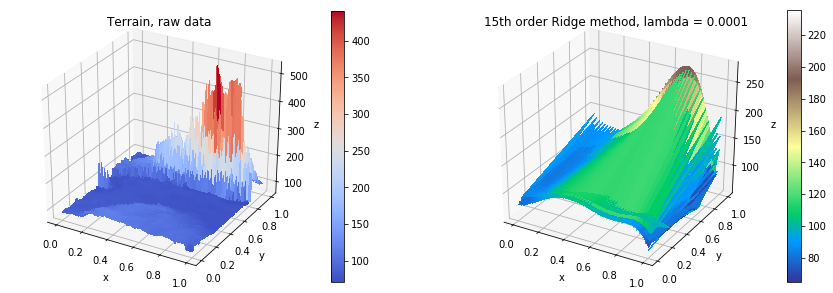

<Figure size 432x288 with 0 Axes>

In [49]:
#Ridge method
from sklearn.linear_model import Ridge

# Define various lambda values to be tested
lmb_values = [0.0001, 0.001, 0.1, 10, 100, 1000]
num_values = len(lmb_values)

#Setting up empty matrices for train data

ridge3 = np.zeros((np.ma.size(z_test),num_values))
ridge4 = np.zeros((np.ma.size(z_test),num_values))
ridge5 = np.zeros((np.ma.size(z_test),num_values))
ridge15 = np.zeros((np.ma.size(z_test),num_values))

mse_matrix3=np.zeros(num_values)
mse_matrix4=np.zeros(num_values)
mse_matrix5=np.zeros(num_values)
mse_matrix15=np.zeros(num_values)

r2_matrix3=np.zeros(num_values)
r2_matrix4=np.zeros(num_values)
r2_matrix5=np.zeros(num_values)
r2_matrix15=np.zeros(num_values)


for i,lmb in enumerate(lmb_values):
    
    ##3rd order polynomial
    T3=Ridge(alpha=lmb,fit_intercept=False).fit(Xtrain3,z_train.ravel())
    ridge3[:,i] = T3.predict(Xtest3)
    #MSE for train data
    mse_folds3=cross_val_score(T3, Xtrain3,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
    mse3=np.mean(-mse_folds3)
    mse_matrix3[i]=mse3
    #R2 score for train data
    r2_folds3= cross_val_score(T3, Xtrain3,z_train.ravel(), scoring='r2', cv=kfold)
    r2_3=np.mean(r2_folds3)
    r2_matrix3[i]=r2_3
    
    ##4th order polynomial
    T4=Ridge(alpha=lmb,fit_intercept=False).fit(Xtrain4,z_train.ravel())
    ridge4[:,i] = T4.predict(Xtest4)
    #MSE for train data
    mse_folds4=cross_val_score(T4, Xtrain4,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
    mse4=np.mean(-mse_folds4)
    mse_matrix4[i]=mse4
    #R2 score for train data
    r2_folds4 = cross_val_score(T4, Xtrain4,z_train.ravel(), scoring='r2', cv=kfold)
    r2_4=np.mean(r2_folds4)
    r2_matrix4[i]=r2_4
    
    ##5th order polynomial
    T5=Ridge(alpha=lmb,fit_intercept=False).fit(Xtrain5,z_train.ravel())
    ridge5[:,i] = T5.predict(Xtest5)
    #MSE for train data
    mse_folds5=cross_val_score(T5, Xtrain5,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
    mse5=np.mean(-mse_folds5)
    mse_matrix5[i]=mse5
    #R2 score for train data
    r2_folds5=cross_val_score(T5, Xtrain5,z_train.ravel(), scoring='r2', cv=kfold)
    r2_5=np.mean(r2_folds5)
    r2_matrix5[i]=r2_5
    
    ##15th order polynomial
    T15=Ridge(alpha=lmb,fit_intercept=False).fit(Xtrain15,z_train.ravel())
    ridge15[:,i] = T15.predict(Xtest15)
    #MSE for train data
    mse_folds15=cross_val_score(T15, Xtrain15,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
    mse15=np.mean(-mse_folds15)
    mse_matrix15[i]=mse15
    #R2 score for train data
    r2_folds15=cross_val_score(T15, Xtrain15,z_train.ravel(), scoring='r2', cv=kfold)
    r2_15=np.mean(r2_folds15)
    r2_matrix15[i]=r2_15
    
#Setting up empty matrices for test data

mse_test3=np.zeros(num_values)
mse_test4=np.zeros(num_values)
mse_test5=np.zeros(num_values)
mse_test15=np.zeros(num_values)

r2_test3=np.zeros(num_values)
r2_test4=np.zeros(num_values)
r2_test5=np.zeros(num_values)
r2_test15=np.zeros(num_values)

#MSE and R2 score for test data

for i,lmb in enumerate(lmb_values):
    mse_test3[i]=mean_squared_error(z_test.ravel(), ridge3[:,i])
    mse_test4[i]=mean_squared_error(z_test.ravel(), ridge4[:,i])
    mse_test5[i]=mean_squared_error(z_test.ravel(), ridge5[:,i])
    mse_test15[i]=mean_squared_error(z_test.ravel(), ridge15[:,i])
    r2_test3[i]=r2_score(z_test.ravel(), ridge3[:,i])
    r2_test4[i]=r2_score(z_test.ravel(), ridge4[:,i])
    r2_test5[i]=r2_score(z_test.ravel(), ridge5[:,i])
    r2_test15[i]=r2_score(z_test.ravel(), ridge15[:,i])

fig2 = plt.figure(figsize=(15,5))
ax2 = fig2.add_subplot(1, 2, 1, projection='3d')
surf = ax2.plot_surface(xx, yy, data, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the plot.
ax2.set_title('Terrain, raw data')
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
fig2.colorbar(surf)

fig5 = plt.figure()
ax5 = fig2.add_subplot(1, 2, 2, projection='3d')

surf = ax5.plot_surface(x_test, y_test, ridge15[:,1].reshape(*x_test.shape), linewidth = 0, antialiased = False, cmap=cm.terrain)
ax5.set_title('15th order Ridge method, lambda = 0.0001')
ax5.set_xlabel("x")
ax5.set_ylabel("y")
ax5.set_zlabel("z")
fig2.colorbar(surf)

fig2.savefig('Figure_terrainRidge.png')

##Printing MSE


print('Mean squared error for Ridge method')

#3rd order polynomial
print('3rd order polynomial')
print('lambda|','Training MSE|','Test MSE|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, mse_matrix3[i], mse_test3[i]))

#4th order polynomial
print('4th order polynomial')
print('lambda|','Training MSE|','Test MSE|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, mse_matrix4[i], mse_test4[i]))
    
#5th order polynomial
print('5th order polynomial')
print('lambda|','Training MSE|','Test MSE|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, mse_matrix5[i], mse_test5[i]))
    
#15th order polynomial
print('15th order polynomial')
print('lambda|','Training MSE|','Test MSE|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, mse_matrix15[i], mse_test15[i]))
    
#Printing R2 score

print('R2 score for Ridge method')

#3rd order polynomial
print('3rd order polynomial')
print('lambda|','Training R2|','Test R2|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, r2_matrix3[i], r2_test3[i]))

#4th order polynomial
print('4th order polynomial')
print('lambda|','Training R2|','Test R2|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, r2_matrix4[i], r2_test4[i]))
    
#5th order polynomial
print('5th order polynomial')
print('lambda|','Training R2|','Test R2|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, r2_matrix5[i], r2_test5[i]))
    
#15th order polynomial
print('15th order polynomial')
print('lambda|','Training R2|','Test R2|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, r2_matrix15[i], r2_test15[i]))

In [51]:
#Lasso method
from sklearn.linear_model import Lasso

# Define various lambda values to be tested
lmb_values = [0.0001, 0.001, 0.1, 10, 100, 1000]
num_values = len(lmb_values)

#Setting up empty matrices for train data

lasso3 = np.zeros((np.ma.size(z_test),num_values))
lasso4 = np.zeros((np.ma.size(z_test),num_values))
lasso5 = np.zeros((np.ma.size(z_test),num_values))
lasso15 = np.zeros((np.ma.size(z_test),num_values))

mse_matrix3=np.zeros(num_values)
mse_matrix4=np.zeros(num_values)
mse_matrix5=np.zeros(num_values)
mse_matrix15=np.zeros(num_values)

r2_matrix3=np.zeros(num_values)
r2_matrix4=np.zeros(num_values)
r2_matrix5=np.zeros(num_values)
r2_matrix15=np.zeros(num_values)


for i,lmb in enumerate(lmb_values):
    
    ##3rd order polynomial
    T3=Lasso(alpha=lmb,fit_intercept=False).fit(Xtrain3,z_train.ravel())
    lasso3[:,i] = T3.predict(Xtest3)
    #MSE for train data
    mse_folds3=cross_val_score(T3, Xtrain3,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
    mse3=np.mean(-mse_folds3)
    mse_matrix3[i]=mse3
    #R2 score for train data
    r2_folds3= cross_val_score(T3, Xtrain3,z_train.ravel(), scoring='r2', cv=kfold)
    r2_3=np.mean(r2_folds3)
    r2_matrix3[i]=r2_3
    
    ##4th order polynomial
    T4=Lasso(alpha=lmb,fit_intercept=False).fit(Xtrain4,z_train.ravel())
    lasso4[:,i] = T4.predict(Xtest4)
    #MSE for train data
    mse_folds4=cross_val_score(T4, Xtrain4,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
    mse4=np.mean(-mse_folds4)
    mse_matrix4[i]=mse4
    #R2 score for train data
    r2_folds4 = cross_val_score(T4, Xtrain4,z_train.ravel(), scoring='r2', cv=kfold)
    r2_4=np.mean(r2_folds4)
    r2_matrix4[i]=r2_4
    
    ##5th order polynomial
    T5=Lasso(alpha=lmb,fit_intercept=False).fit(Xtrain5,z_train.ravel())
    lasso5[:,i] = T5.predict(Xtest5)
    #MSE for train data
    mse_folds5=cross_val_score(T5, Xtrain5,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
    mse5=np.mean(-mse_folds5)
    mse_matrix5[i]=mse5
    #R2 score for train data
    r2_folds5=cross_val_score(T5, Xtrain5,z_train.ravel(), scoring='r2', cv=kfold)
    r2_5=np.mean(r2_folds5)
    r2_matrix5[i]=r2_5
    
    ##15th order polynomial
    T15=Lasso(alpha=lmb,fit_intercept=False).fit(Xtrain15,z_train.ravel())
    lasso15[:,i] = T15.predict(Xtest15)
    #MSE for train data
    mse_folds15=cross_val_score(T15, Xtrain15,z_train.ravel(), scoring='neg_mean_squared_error', cv=kfold)
    mse15=np.mean(-mse_folds15)
    mse_matrix15[i]=mse15
    #R2 score for train data
    r2_folds15=cross_val_score(T15, Xtrain15,z_train.ravel(), scoring='r2', cv=kfold)
    r2_15=np.mean(r2_folds15)
    r2_matrix15[i]=r2_15
    
#Setting up empty matrices for test data

mse_test3=np.zeros(num_values)
mse_test4=np.zeros(num_values)
mse_test5=np.zeros(num_values)
mse_test15=np.zeros(num_values)

r2_test3=np.zeros(num_values)
r2_test4=np.zeros(num_values)
r2_test5=np.zeros(num_values)
r2_test15=np.zeros(num_values)

#MSE and R2 score for test data

for i,lmb in enumerate(lmb_values):
    mse_test3[i]=mean_squared_error(z_test.ravel(), lasso3[:,i])
    mse_test4[i]=mean_squared_error(z_test.ravel(), lasso4[:,i])
    mse_test5[i]=mean_squared_error(z_test.ravel(), lasso5[:,i])
    mse_test15[i]=mean_squared_error(z_test.ravel(), lasso15[:,i])
    r2_test3[i]=r2_score(z_test.ravel(), lasso3[:,i])
    r2_test4[i]=r2_score(z_test.ravel(), lasso4[:,i])
    r2_test5[i]=r2_score(z_test.ravel(), lasso5[:,i])
    r2_test15[i]=r2_score(z_test.ravel(), lasso15[:,i])


##Printing MSE


print('Mean squared error for Lasso method')

#3rd order polynomial
print('3rd order polynomial')
print('lambda|','Training MSE|','Test MSE|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, mse_matrix3[i], mse_test3[i]))

#4th order polynomial
print('4th order polynomial')
print('lambda|','Training MSE|','Test MSE|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, mse_matrix4[i], mse_test4[i]))
    
#5th order polynomial
print('5th order polynomial')
print('lambda|','Training MSE|','Test MSE|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, mse_matrix5[i], mse_test5[i]))

#15th order polynomial
print('15th order polynomial')
print('lambda|','Training MSE|','Test MSE|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, mse_matrix15[i], mse_test15[i]))
    
#Printing R2 score

print('R2 score for Lasso method')

#3rd order polynomial
print('3rd order polynomial')
print('lambda|','Training R2|','Test R2|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, r2_matrix3[i], r2_test3[i]))

#4th order polynomial
print('4th order polynomial')
print('lambda|','Training R2|','Test R2|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, r2_matrix4[i], r2_test4[i]))
    
#5th order polynomial
print('5th order polynomial')
print('lambda|','Training R2|','Test R2|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, r2_matrix5[i], r2_test5[i]))
    
#15th order polynomial
print('15th order polynomial')
print('lambda|','Training R2|','Test R2|')

for i,lmb in enumerate(lmb_values):
    print("|%9g|%11f|%10f|" % \
      (lmb, r2_matrix15[i], r2_test15[i]))

C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the n

C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the n

C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the n

C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mau\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the n

Mean squared error for Lasso method
3rd order polynomial
lambda| Training MSE| Test MSE|
|   0.0001|1631.833586|1520.644971|
|    0.001|1632.118632|1521.427679|
|      0.1|1702.348660|1578.868711|
|       10|2323.323383|2045.607269|
|      100|12178.200077|12251.928982|
|     1000|12206.870063|12251.928982|
4th order polynomial
lambda| Training MSE| Test MSE|
|   0.0001|1579.827919|1448.311956|
|    0.001|1580.161291|1448.999617|
|      0.1|1688.113459|1586.179115|
|       10|2323.323383|2045.607269|
|      100|12178.200077|12251.928982|
|     1000|12206.870063|12251.928982|
5th order polynomial
lambda| Training MSE| Test MSE|
|   0.0001|1482.352400|1332.321792|
|    0.001|1483.575975|1333.869739|
|      0.1|1618.031884|1484.966139|
|       10|2323.323383|2045.607269|
|      100|12178.200077|12251.928982|
|     1000|12206.870063|12251.928982|
15th order polynomial
lambda| Training MSE| Test MSE|
|   0.0001| 981.272121|946.662321|
|    0.001| 981.930683|946.423818|
|      0.1|1187.13046